In [ ]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """
    
    def __init__(self, grid_size, wind, discount):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1))
        self.n_actions = len(self.actions)
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind
        self.discount = discount

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)
    
    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)

    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)
        

        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return 1 - 0.75 * self.wind

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind / 4

        
        # If these are the same point, we can only move here by either moving
        # off the grid or being blown off the grid. Are we on a corner or not?
        if i in [0, self.grid_size-1, self.grid_size*10, self.grid_size**2-1]:
            # Corner.
            # Can move off the edge in two directions.
            # Did we intend to move off the grid?
            if min(xi+xj, yi+yj) < 0 or max(xi+xj, yi+yj) >= self.grid_size: 
                # we have the regular success chance of staying here
                # plus an extra chance of blowing onto the *other* off-grid square
                return 1 - 0.5 * self.wind
            else:
                # We can blow off the grid in either direction only by wind.
                return 0.5 * self.wind
        else:
            # Not a corner. Is it an edge?
            if 0 < xi < self.grid_size-1 and 0 < yi < self.grid_size-1:
                return 0
            
            else:#it is an edge
                # we Can only move off the edge in one direction.
                # Did we intend to move off the grid?
                if min(xi+xj, yi+yj) < 0 or max(xi+xj, yi+yj) >= self.grid_size:
                    #we have the regular success chance of staying here.
                    return 1 - 0.75 * self.wind
                else:
                    # We can blow off the grid only by wind.
                    return self.wind / 4

    def reward(self, state_int, rw_function=1):
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
        if rw_function == 1:
            postive_reward = 1
            negative_reward = -10
            negative_set = {14, 15, 24, 25, 28, 29, 38, 39, 52, 53, 62, 63}
        if rw_function == 2:
            postive_reward = 10
            negative_reward = -100
            negative_set = {41, 42, 43, 44, 45, 46, 51, 61, 62, 
                            63, 67, 68, 73, 77, 83, 84, 85, 86, 87}
        
        #look at figure 6,7 to retrurn a reward at the given state. 
        if state_int == 99:
            return postive_reward
        elif state_int in negative_set:
            return negative_reward
        else:
            return 0

In [ ]:

## Function for plotting the matrix values

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j+0.5, i+0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.1
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

##Q1

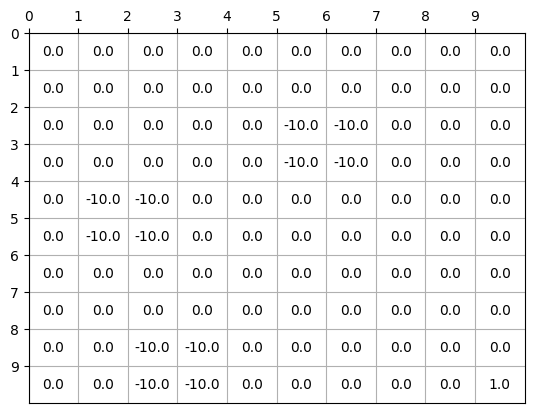

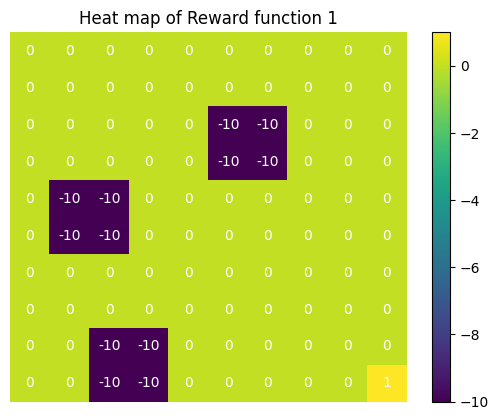

In [ ]:
## Plotting the reward value for each state of the grid
def reward_grid_plot(rw_function=1):
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = gw.reward(gw.point_to_int((i,j)), rw_function)
    plot_matrix(reward_matrix)
    return reward_matrix
reward_matrix = reward_grid_plot(rw_function=1)

## For visualization generating the heat map of the ground truth reward
plt.pcolor(np.flipud(reward_matrix))
for i in range(reward_matrix.shape[0]):
    for j in range(reward_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{reward_matrix[i, j]:.0f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')
plt.show()

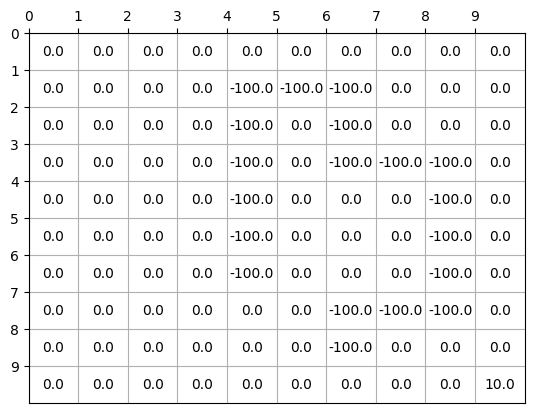

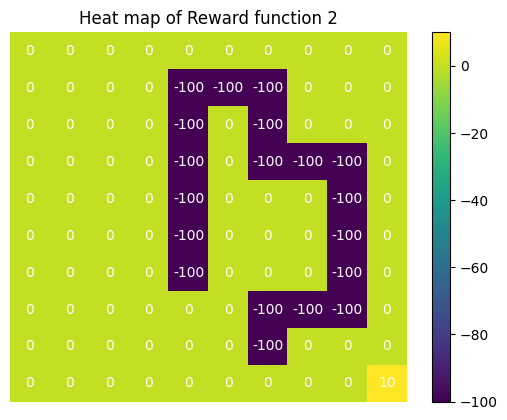

In [ ]:
## Plotting the reward value for each state of the grid
def reward_grid_plot(rw_function=1):
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = gw.reward(gw.point_to_int((i,j)), rw_function)
    plot_matrix(reward_matrix)
    return reward_matrix
reward_matrix = reward_grid_plot(rw_function=2)

## For visualization generating the heat map of the ground truth reward
plt.pcolor(np.flipud(reward_matrix))
for i in range(reward_matrix.shape[0]):
    for j in range(reward_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{reward_matrix[i, j]:.0f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 2')
plt.show()

##Q2,3,4

In [ ]:
## Implementing the algorithm for computing the optimal value function for each state
## The algorithm takes as input the MDP and returns an array of optimal values,
## where i^th value in the array corresponds to the optimal value of the i^th state.

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2, return_step=False):
    """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """

    v = np.zeros(n_states)

    #write code here
    delta = np.inf
    timer = 0
    while delta > threshold:
        timer += 1
        delta = 0
        for i in range(n_states):
            # old v[i]
            tmp_v = v[i]

            # calculate new v[i]
            new_values = []
            for a in range(n_actions):
                new_values.append(np.sum(transition_probabilities[i][a] * 
                                         (reward + discount * v)))
            v[i] = max(new_values)

            # calculate delta
            delta = max(delta, abs(v[i] - tmp_v))
    print(f"Takes {timer} steps to converge")
    if not return_step:
        return v

    if return_step:
        v = np.zeros(n_states)

        max_times = timer
        step_v = {}
        #write code here
        delta = 1e10
        timer = 0
        while delta > threshold:
            timer += 1
            delta = 0
            for i in range(n_states):
                # old v[i]
                tmp_v = v[i]

                # calculate new v[i]
                new_values = []
                for a in range(n_actions):
                    new_values.append(np.dot(transition_probabilities[i][a], 
                                            (reward + discount * v)))
                v[i] = max(new_values)

                # calculate delta
                delta = max(delta, abs(v[i] - tmp_v))
            
            snap_shot = [int(t * max_times / 4 + 1) for t in range(4)]
            if timer in snap_shot:
                step_v[timer] = v.copy()

        step_v[timer] = v
        print(f"take snap shot after step {snap_shot + [timer]}")
        return step_v

Takes 21 steps to converge


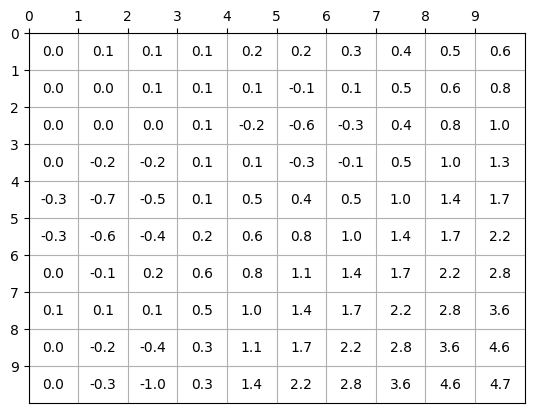

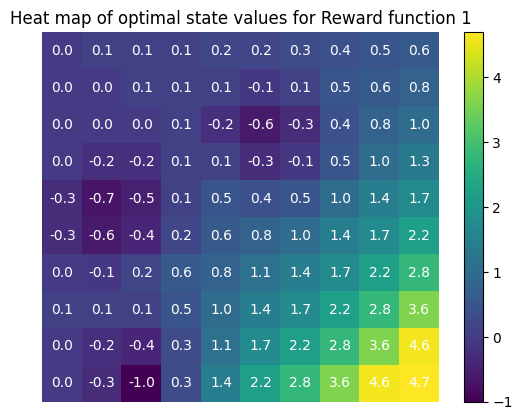

In [ ]:
## Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

plot_matrix(value_matrix)

## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))

for i in range(value_matrix.shape[0]):
    for j in range(value_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.1f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

Takes 21 steps to converge
take snap shot after step [1, 6, 11, 16, 21]
snapshots of state values at step 1/21


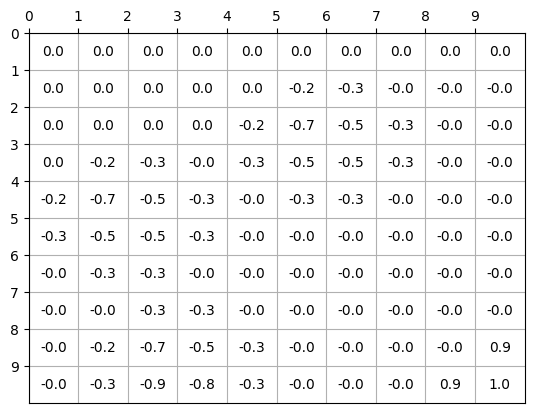

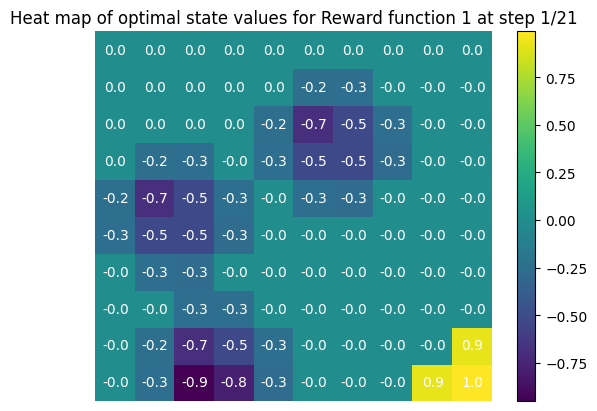

snapshots of state values at step 6/21


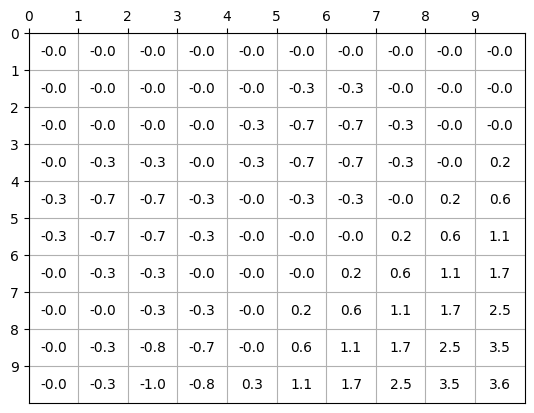

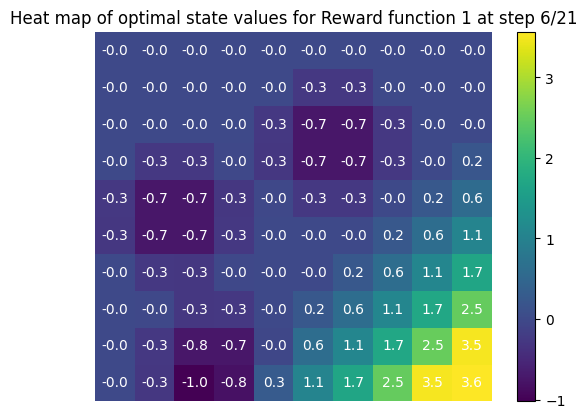

snapshots of state values at step 11/21


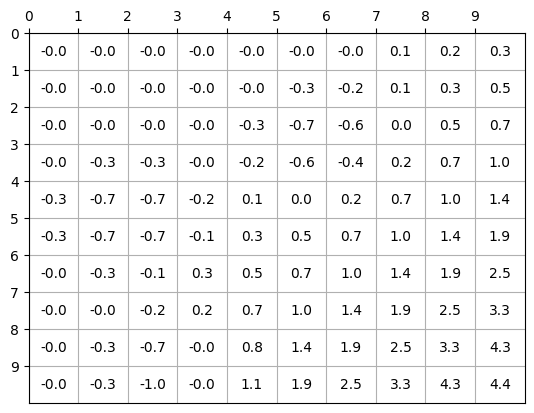

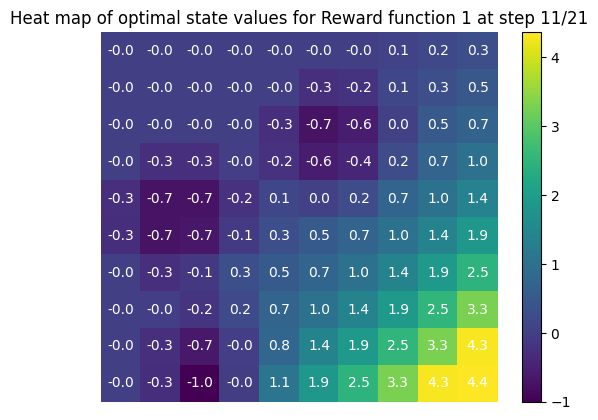

snapshots of state values at step 16/21


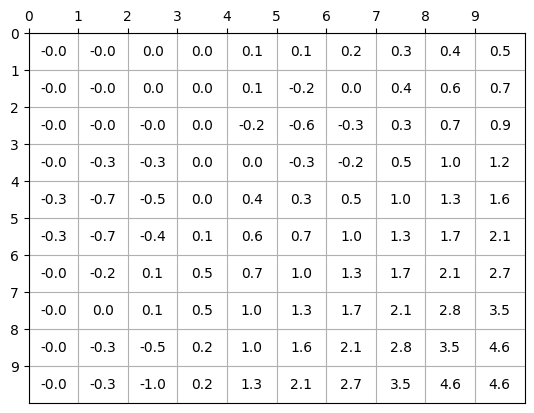

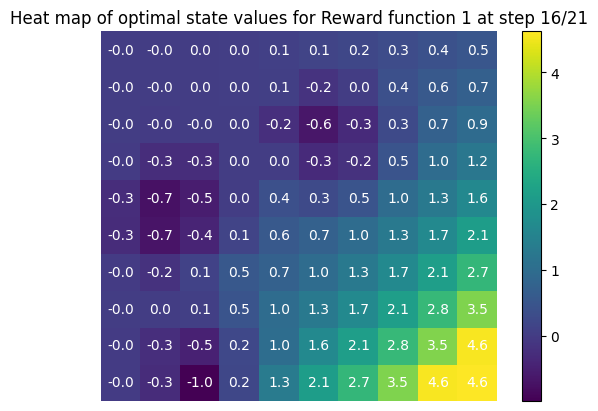

snapshots of state values at step 21/21


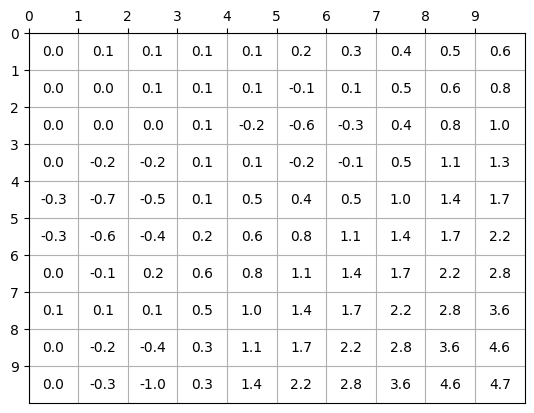

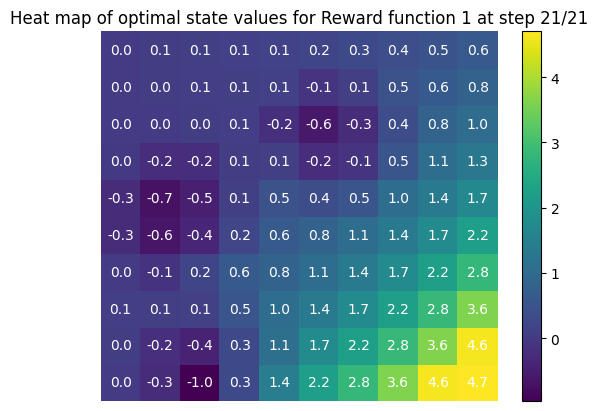

In [ ]:
## Plotting the optimal values in 5 steps
reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i, rw_function=1)
    
# Computing the optimal value of each state
step_v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount, return_step=True)

for step in step_v:
    v = step_v[step]

    value_matrix = np.zeros((grid_size, grid_size))
    for i in range(gw.n_states):
        value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 2)
    
    print(f"snapshots of state values at step {step}/{list(step_v.keys())[-1]}")
    plot_matrix(value_matrix)

    ## For visualization generating the heat map of the optimal state values
    plt.pcolor(np.flipud(value_matrix))

    for i in range(value_matrix.shape[0]):
        for j in range(value_matrix.shape[1]):
            plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.1f}', 
                    ha='center', va='center', color='w')
    plt.colorbar()
    plt.axis('off')
    plt.title(f'Heat map of optimal state values for Reward function 1\
 at step {step}/{list(step_v.keys())[-1]}')
    plt.show()

## Q5

In [ ]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """

    if v is None:
        v = optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold)

    def _policy(s):
        # calculate new v[i]
        new_values = []
        for a in range(n_actions):
            new_values.append(np.dot(transition_probabilities[s][a], 
                                        (reward + discount * v)))
        return np.argmax(new_values)
     
    policy = np.array([_policy(s) for s in range(n_states)])
    return policy

In [ ]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'
            
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

Takes 21 steps to converge


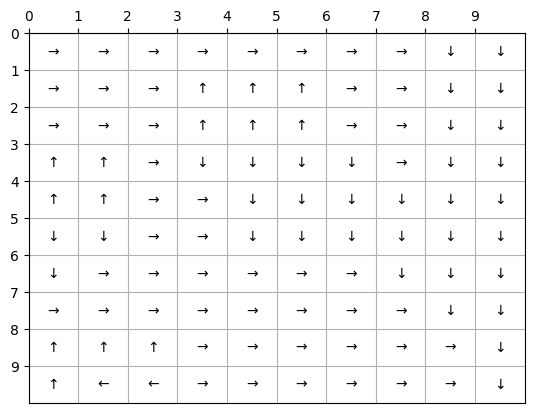

In [ ]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, 
                             gw.transition_probability,
                             reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


## Q6,7

Takes 31 steps to converge
take snap shot after step [1, 8, 16, 24, 31]
snapshots of state values at step 1/31


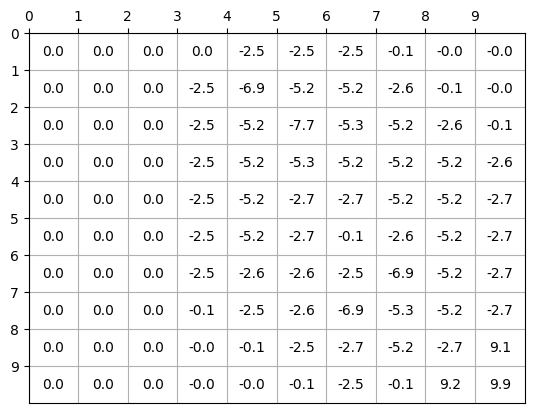

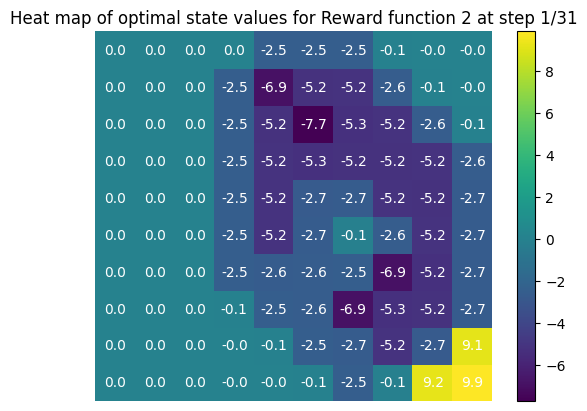

snapshots of state values at step 8/31


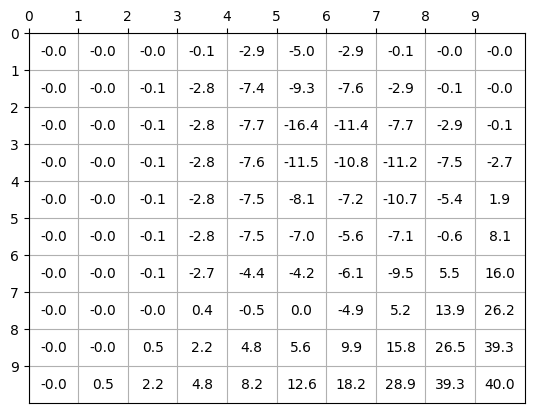

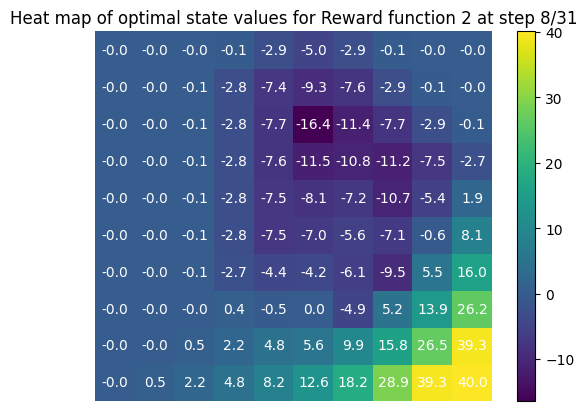

snapshots of state values at step 16/31


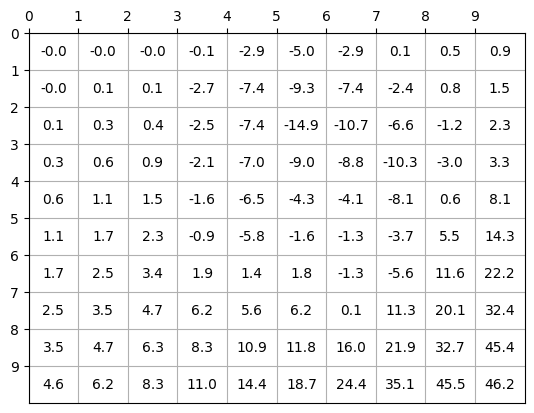

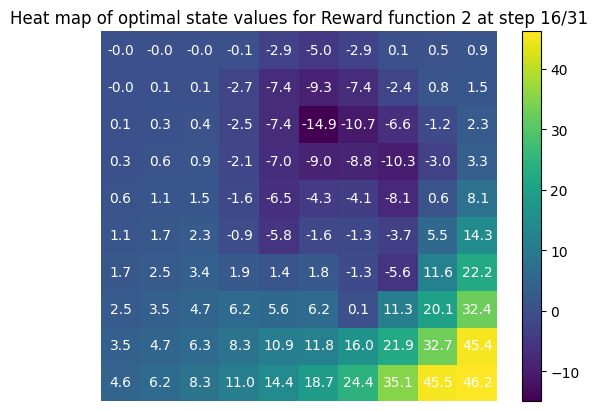

snapshots of state values at step 24/31


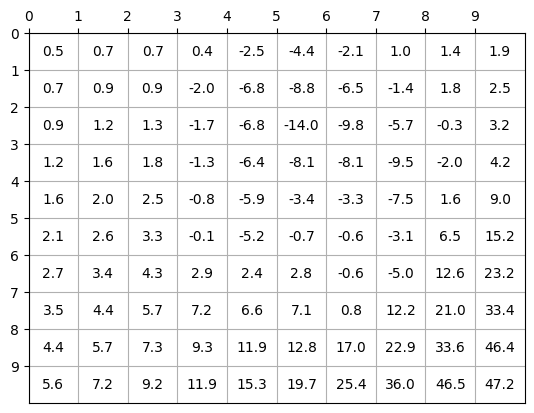

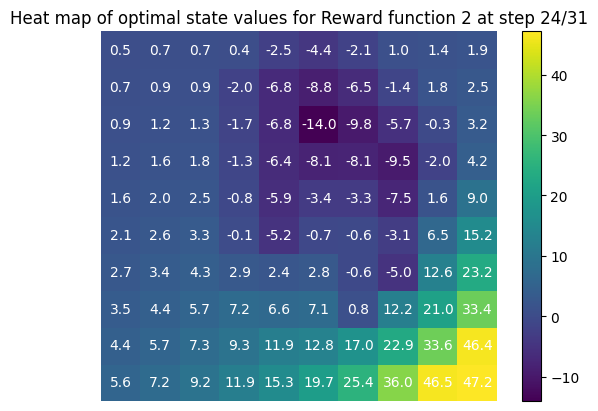

snapshots of state values at step 31/31


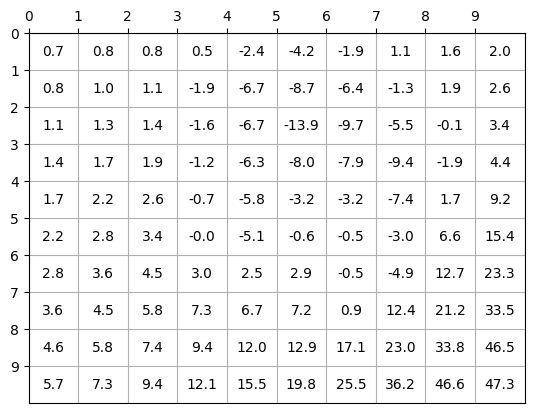

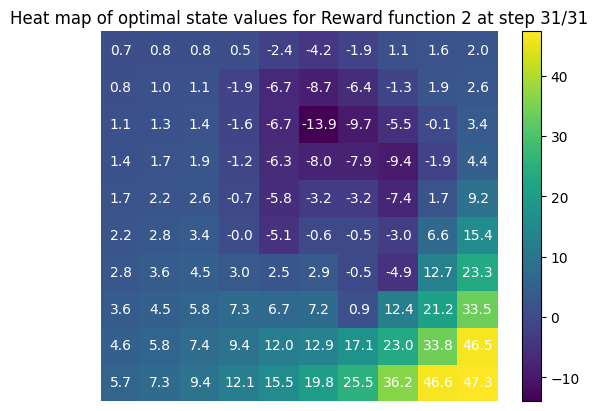

In [ ]:
## Plotting the optimal values in 5 steps
reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i, rw_function=2)
    
# Computing the optimal value of each state
step_v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount, return_step=True)

for step in step_v:
    v = step_v[step]

    value_matrix = np.zeros((grid_size, grid_size))
    for i in range(gw.n_states):
        value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 2)
    
    print(f"snapshots of state values at step {step}/{list(step_v.keys())[-1]}")
    plot_matrix(value_matrix)

    ## For visualization generating the heat map of the optimal state values
    plt.pcolor(np.flipud(value_matrix))

    for i in range(value_matrix.shape[0]):
        for j in range(value_matrix.shape[1]):
            plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.1f}', 
                    ha='center', va='center', color='w')
    plt.colorbar()
    plt.axis('off')
    plt.title(f'Heat map of optimal state values for Reward function 2\
 at step {step}/{list(step_v.keys())[-1]}')
    plt.show()

## Q8

Takes 31 steps to converge


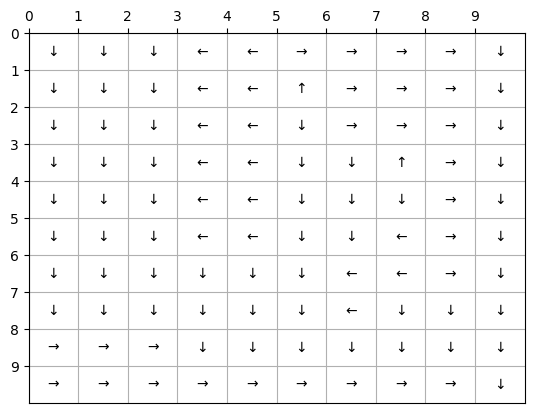

In [ ]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, 
                             gw.transition_probability,
                             reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


## Q9

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.6
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

Takes 16 steps to converge


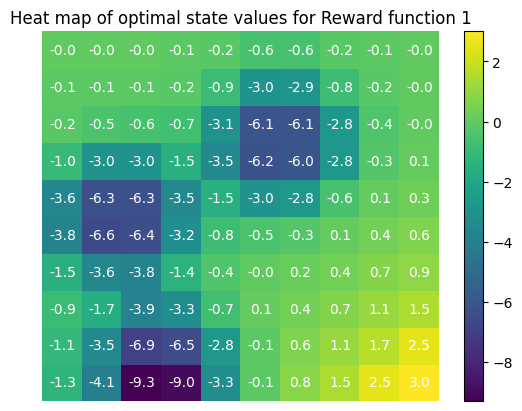

Takes 16 steps to converge


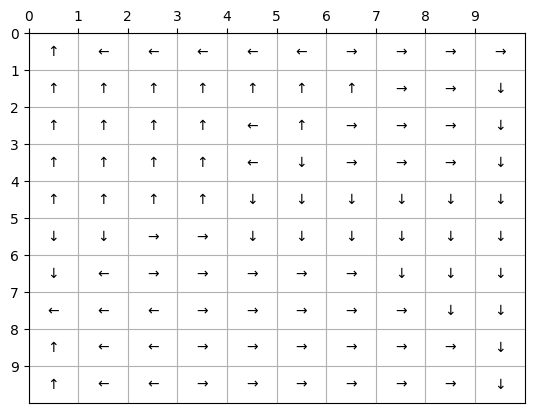

In [ ]:
## Plotting the optimal values in 5 steps
reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i, rw_function=1)


# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

# plot_matrix(value_matrix)

## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))

for i in range(value_matrix.shape[0]):
    for j in range(value_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.1f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

## Plotting the optimal actions for each state in the grid
# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, 
                             gw.transition_probability,
                             reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


Takes 22 steps to converge


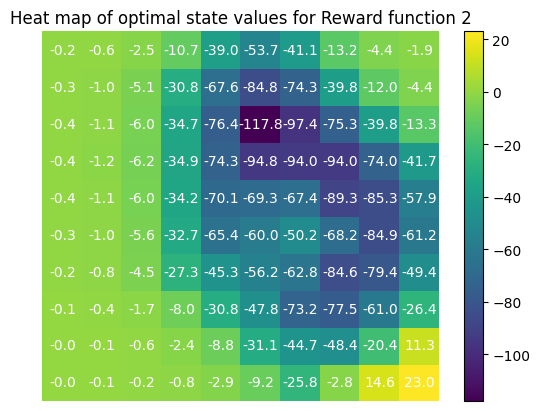

Takes 22 steps to converge


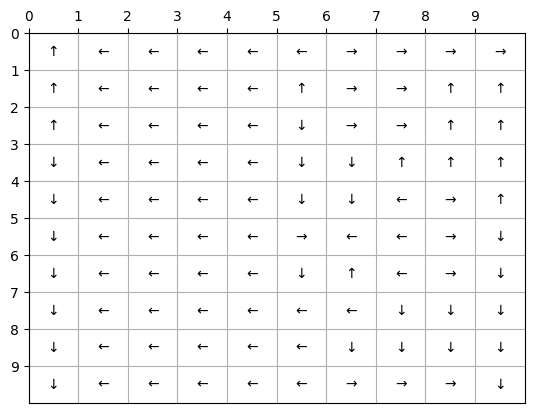

In [ ]:
## Plotting the optimal values in 5 steps
reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i, rw_function=2)


# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

# plot_matrix(value_matrix)

## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))

for i in range(value_matrix.shape[0]):
    for j in range(value_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.1f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 2')
plt.show()

## Plotting the optimal actions for each state in the grid
# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, 
                             gw.transition_probability,
                             reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)

### discount 0.99

Takes 299 steps to converge


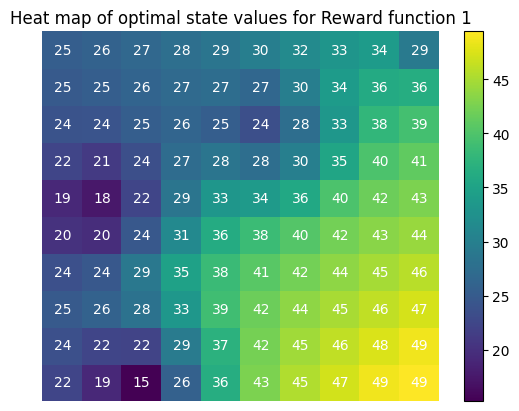

Takes 299 steps to converge


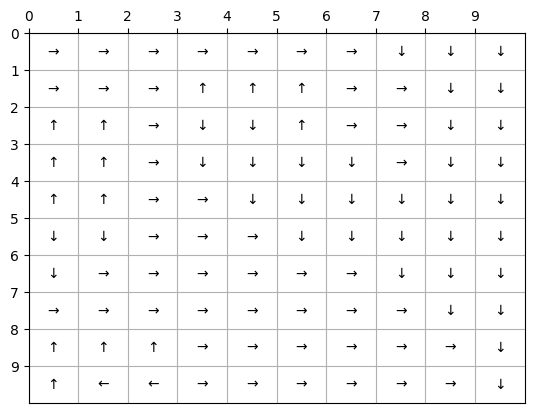

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.6
discount = 0.99

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

## Plotting the optimal values in 5 steps
reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i, rw_function=1)


# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

# plot_matrix(value_matrix)

## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))

for i in range(value_matrix.shape[0]):
    for j in range(value_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.0f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

## Plotting the optimal actions for each state in the grid
# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, 
                             gw.transition_probability,
                             reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


Takes 367 steps to converge


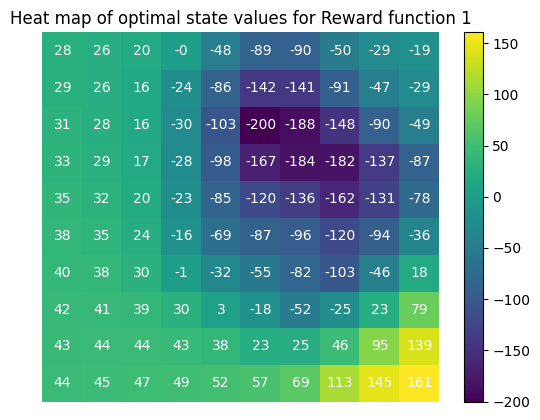

Takes 367 steps to converge


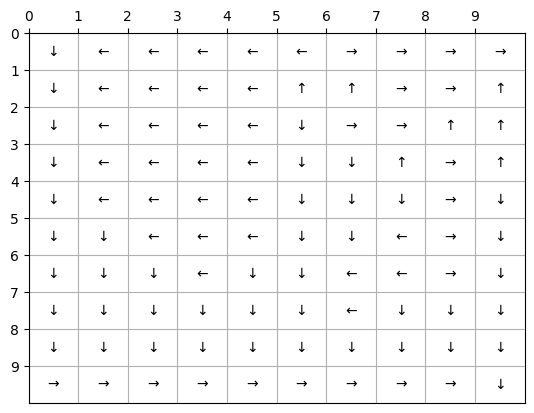

In [ ]:
## Plotting the optimal values in 5 steps
reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i, rw_function=2)


# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

# plot_matrix(value_matrix)

## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))

for i in range(value_matrix.shape[0]):
    for j in range(value_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.0f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

## Plotting the optimal actions for each state in the grid
# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, 
                             gw.transition_probability,
                             reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)

### discount 0.999

Takes 3639 steps to converge


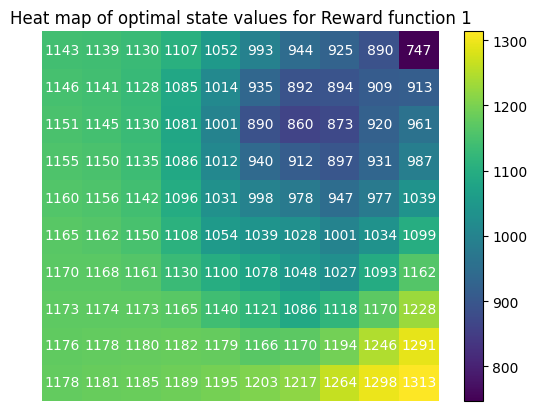

Takes 3639 steps to converge


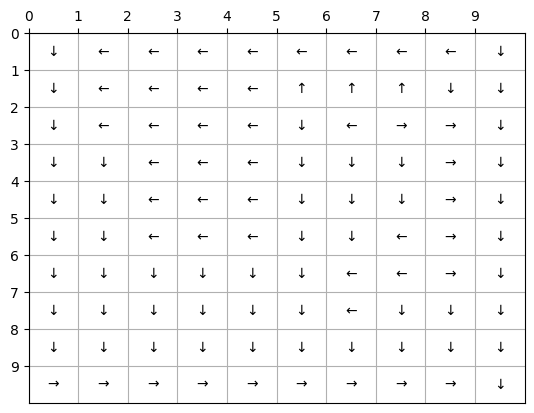

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.6
discount = 0.999

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

## Plotting the optimal values in 5 steps
reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i, rw_function=2)


# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, 
                  reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

# plot_matrix(value_matrix)

## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))

for i in range(value_matrix.shape[0]):
    for j in range(value_matrix.shape[1]):
        plt.text(0.5+j, 9.5-i, f'{value_matrix[i, j]:.0f}', 
                 ha='center', va='center', color='w')
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

## Plotting the optimal actions for each state in the grid
# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, 
                             gw.transition_probability,
                             reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)